# **Question 7**

## **(a) Write a program to plot $\hat{F_n}$ given a list of samples as input. Your plot must have y-limits from 0 to 1, and x-limits from 0 to the largest sample. Also show the input points as Xs on the x-axis.**

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
# Function to plot the figures
def draw_figure(x, y):
    plt.figure(figsize=(20,10))
    plt.step(x, y, where="post", label="CDF")
    plt.xticks(x, rotation = 90)
    plt.yticks(np.arange(0, 1.1, 0.05))
    plt.title("Empirical CDF")
    plt.xlabel("Sample Points")
    plt.ylabel("Pr[X<x]")
    plt.legend(bbox_to_anchor=(1, 0), loc=4, borderaxespad=0.)
    plt.grid(which="both")
    plt.show()

In [3]:
def plot_a(x, plot):
    
    n = len(x)
    x.sort()
    x_a = []
    y_a = []
    y_curr = 0
    
    # Prepending 0's to make graph start from 0
    x_a.append(0)
    y_a.append(0)
    
    for i in x:
        y_curr += 1/n
        y_a.append(y_curr)
        x_a.append(i)
        
    # Removing prepended 0's from x_a and y_a
    x_a = x_a[1:]
    y_a = y_a[1:]
    
    return (x_a, y_a)

* * *

## **(b) Use an integer random number generator with range [1, 99] to draw n=10, 100, 1000, 10000 samples. Feed these as input to (a) to generate four plots. What do you observe?**

### For n = 10

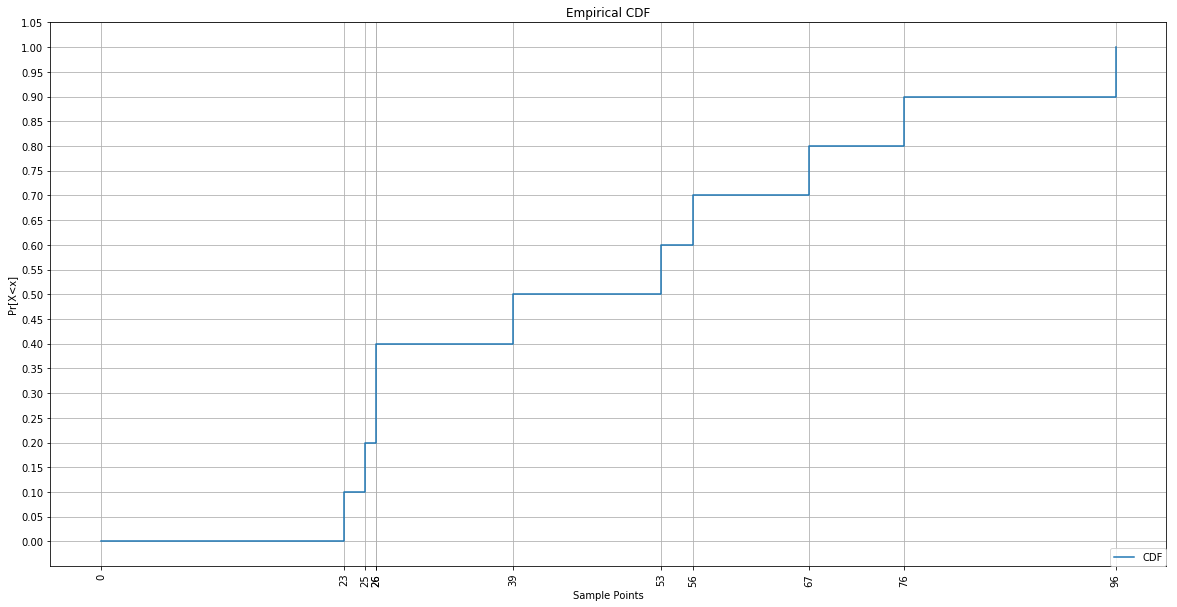

In [15]:
x = np.random.randint(1,100,10)
tx, ty = plot_a(x,1)
tx = np.insert(tx,0,0)
ty = np.insert(ty,0,0)
draw_figure(tx,ty)

### For n = 100

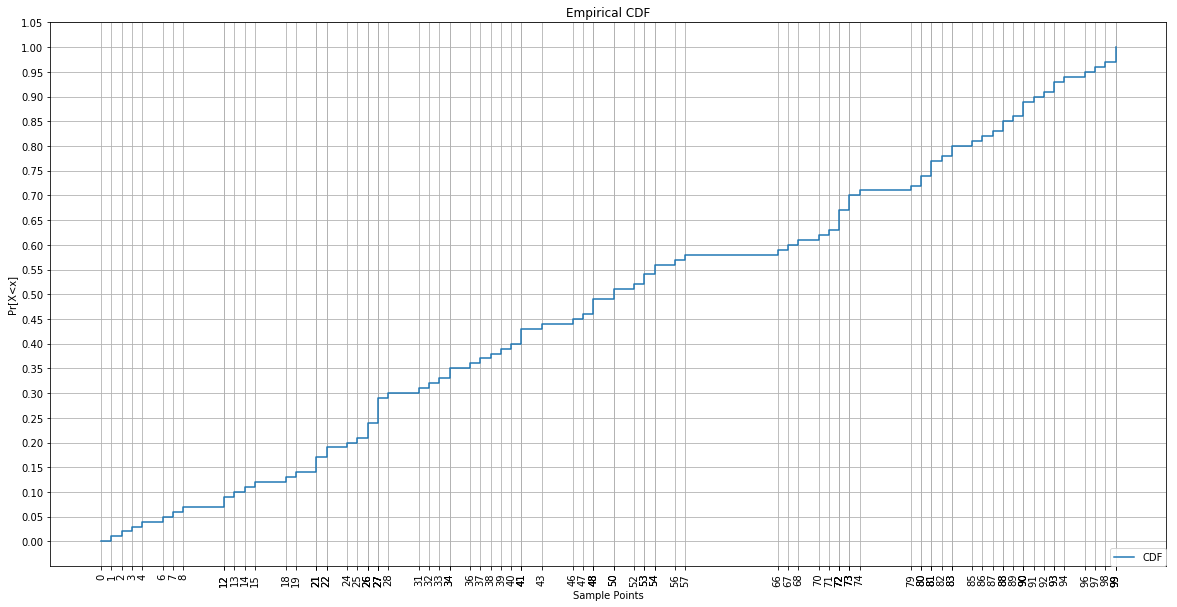

In [16]:
# n = 100
x = np.random.randint(1,100,100)
tx, ty = plot_a(x, 1)
tx.insert(0,0)
ty.insert(0,0)
draw_figure(tx,ty)

### For n = 1000

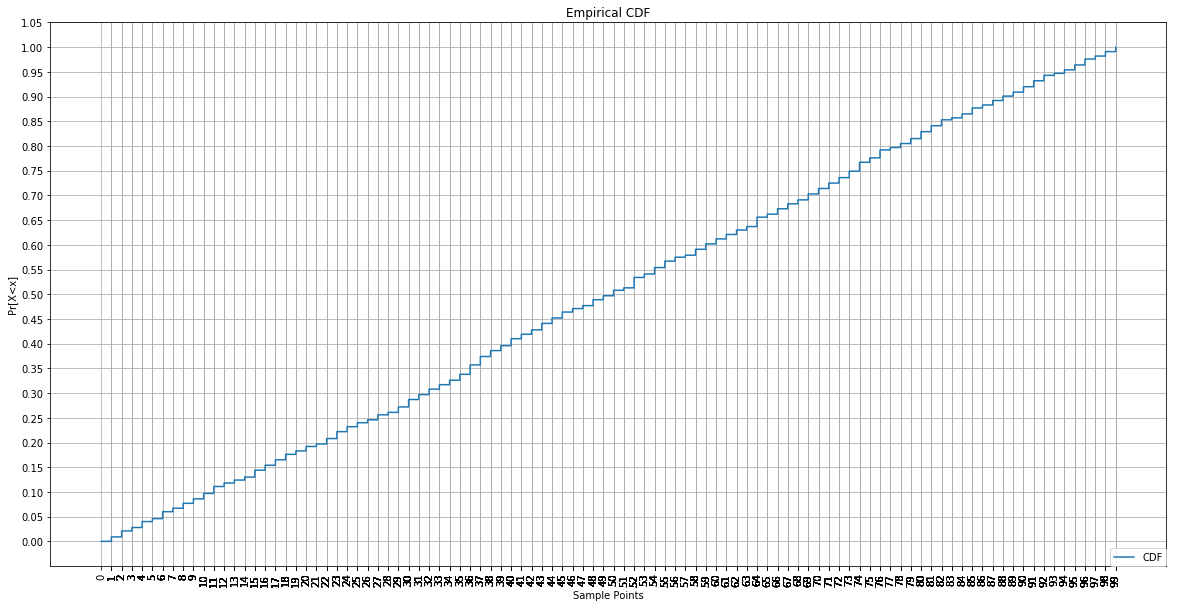

In [17]:
# n = 1000
x = np.random.randint(1,100,1000)
tx, ty = plot_a(x, 1)
tx.insert(0,0)
ty.insert(0,0)
draw_figure(tx, ty)

### For n = 10000

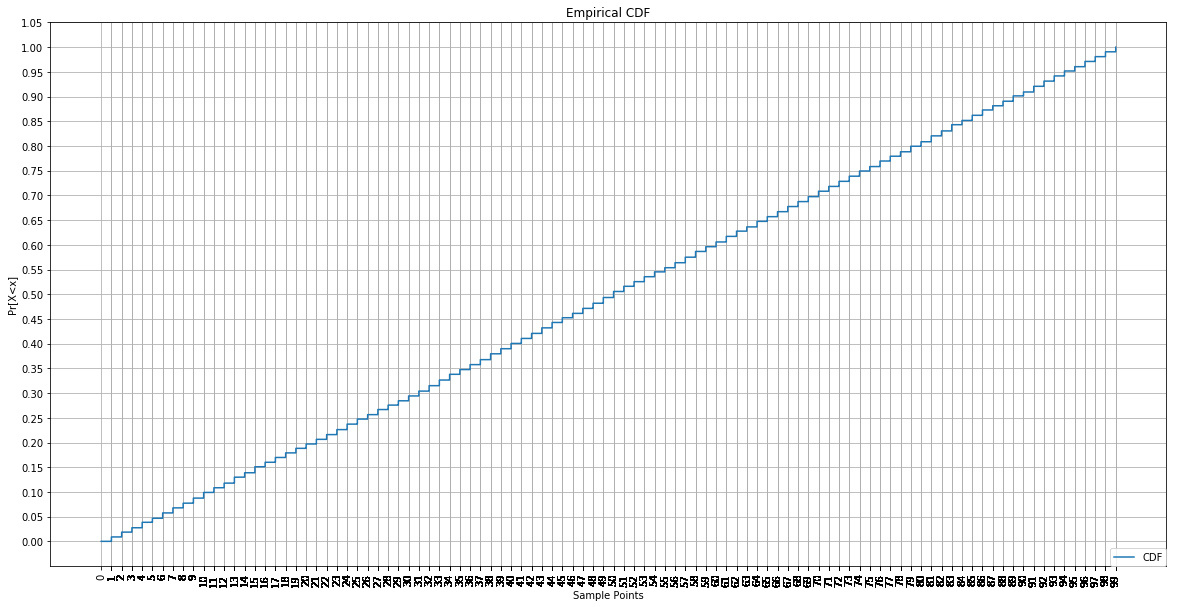

In [18]:
# n = 10000
x = np.random.randint(1,100,10000)
tx, ty = plot_a(x, 1)
tx.insert(0,0)
ty.insert(0,0)
draw_figure(tx, ty)

## We observe that as the number of samples increases, the cdf starts looking like a straight line

---

## **(c) Modify (a) above so that it takes as input a collection of list of samples; that is, a 2-D array of sorts where each row is a list of samples (row=student). The program should now compute the average $\hat{F_n}$ across the rows and plot it. That is, compute the $\hat{F_n}$ for each row, average them all out, and plot the corresponding average $\hat{F_n}$. Show all input points as Xs on the x-axis**

In [23]:
def plot_c(x):
    
    num_rows = x.shape[0]
    d = np.zeros((num_rows,99))
    for i in range(num_rows):
        # First get CDF (row by row) by calling plot_a
        tx, ty = plot_a(x[i], 0)
        
        # Put corresponding F_hat values
        for j in range(len(tx)):
            d[i][tx[j]-1] = ty[j]
        
        # Replace remaining values with previous non zero
        prev = 0
        for j in range(99):
            if d[i][j] == 0:
                d[i][j] = prev
            else:
                prev = d[i][j]
            
    # Averaging F_n hat for each row
    avg = d.mean(0)
    return avg

---
## **(d) Use the same integer random number generator from (b) to draw n=10 samples for m=10, 100, 1000 rows. Feed these as input to (c) to generate three plots. What do you observe?**

### For m = 10

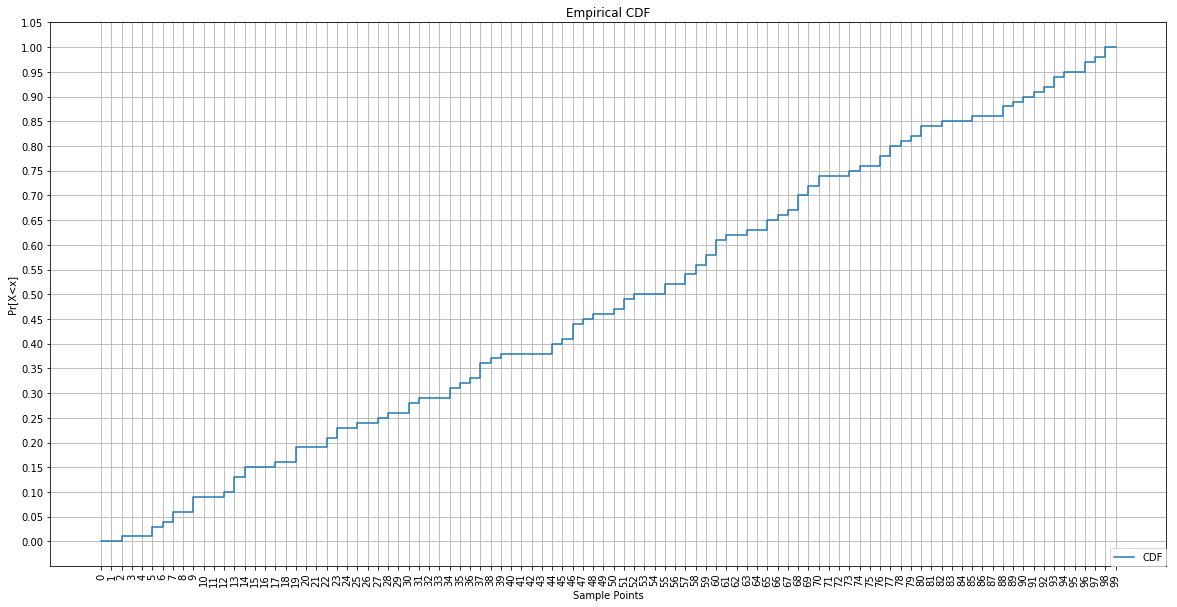

In [29]:
x = np.random.randint(1, 100, size = (10,10))
y = plot_c(x)
x = [i for i in range(1, 100)]
x = np.insert(x,0,0)
y = np.insert(y,0,0)
draw_figure(x,y)

### For m = 100

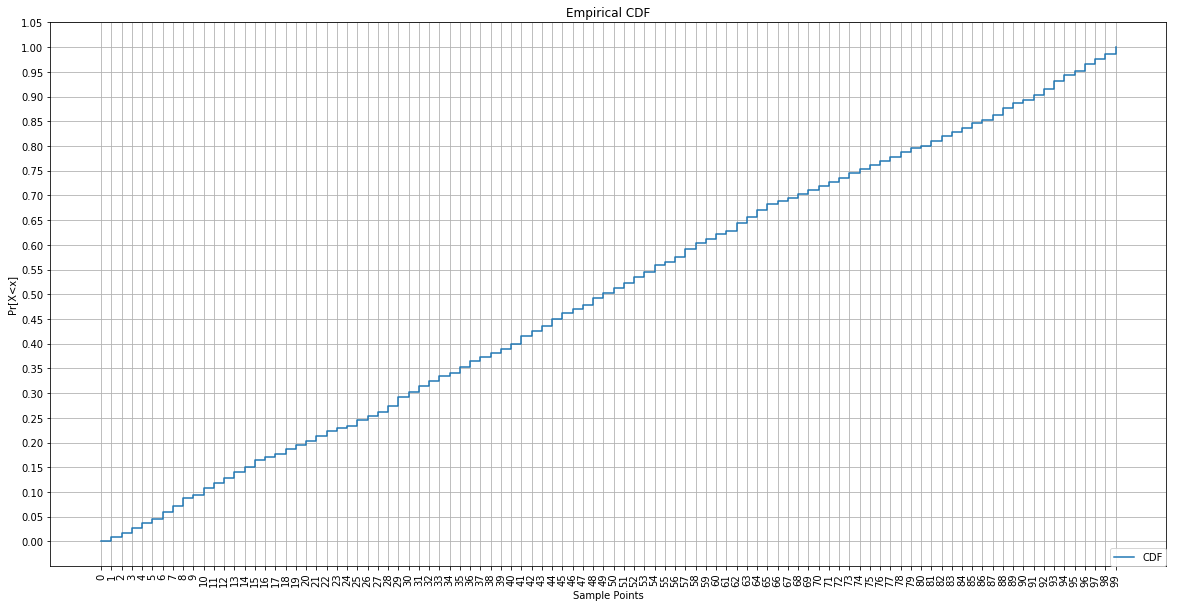

In [21]:
x = np.random.randint(1, 100, size = (100, 10))
y = plot_c(x)
x = [i for i in range(1, 100)]
x = np.insert(x,0,0)
y = np.insert(y,0,0)
# plt.step([i for i in range(1, 100)], d, where="post")
draw_figure(x,y)

### For m = 1000

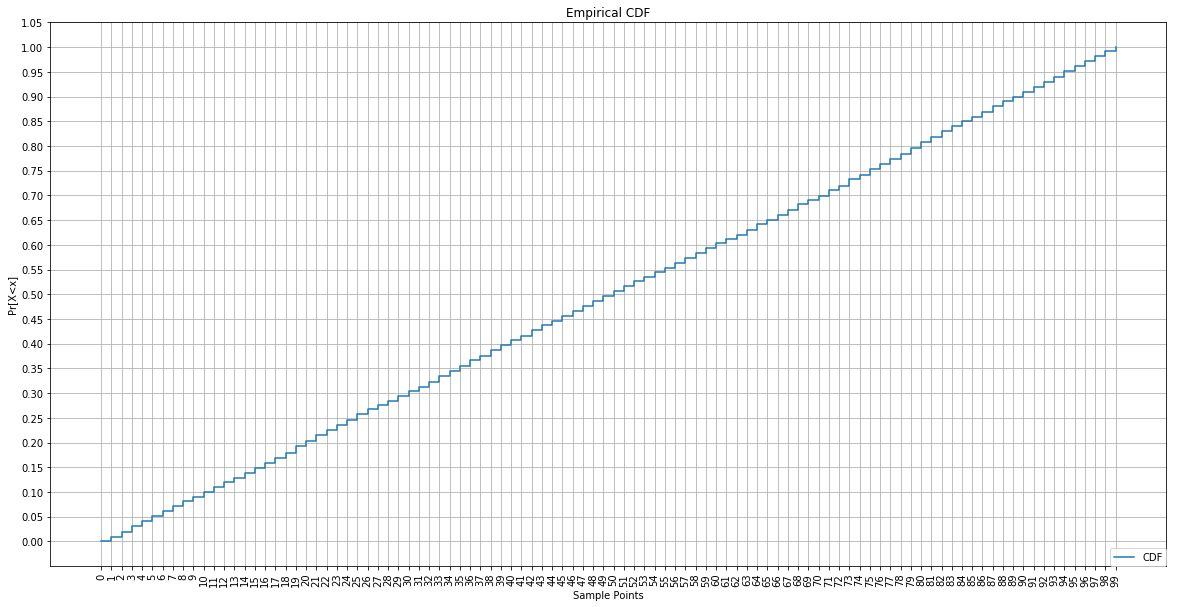

In [22]:
x = np.random.randint(1, 100, size = (1000, 10))
y = plot_c(x)
x = [i for i in range(1, 100)]
x = np.insert(x,0,0)
y = np.insert(y,0,0)
# plt.step([i for i in range(1, 100)], d, where="post")
draw_figure(x,y)

## We observe that as the number of samples increases, the cdf starts looking like a straight line
